# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

In [2]:
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
ID            165085 non-null object
Date          165085 non-null object
Element       165085 non-null object
Data_Value    165085 non-null int64
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


In [4]:
df.Date = pd.to_datetime(df.Date) # convert date column to datetime type

In [5]:
df['Temperature'] = df.Data_Value / 10 # convert to degrees C

In [6]:
df = df.drop('Data_Value', axis = 'columns')

In [7]:
df.head()

,ID,Date,Element,Temperature
0,USW00094889,2014-11-12,TMAX,2.2
1,USC00208972,2009-04-29,TMIN,5.6
2,USC00200032,2008-05-26,TMAX,27.8
3,USC00205563,2005-11-11,TMAX,13.9
4,USC00200230,2014-02-27,TMAX,-10.6


In [8]:
leap_days_indices = (df[(df.Date.dt.day==29)&(df.Date.dt.month==2)]).index  # create a list of leap day record indices 

In [9]:
df = df.drop(leap_days_indices)  # remove leap day records from the df

In [10]:
gb = df.groupby(['Date','Element']).mean().unstack('Element') # get a mean TMIN/TMAX temperature for each date (for all stations)

In [11]:
gb.head()

Temperature          
Element           TMAX      TMIN
Date                            
2005-01-01   10.860000 -3.309524
2005-01-02    8.304762 -1.642105
2005-01-03    8.525000  0.838095
2005-01-04    2.431579 -0.445000
2005-01-05    0.745000 -4.771429

In [12]:
gb.columns = gb.columns.droplevel(0)   # Delete top row of headers (Temperature)
gb.head()

Element,TMAX,TMIN
Date,,
2005-01-01,10.860000,-3.309524
2005-01-02,8.304762,-1.642105
2005-01-03,8.525000,0.838095
2005-01-04,2.431579,-0.445000
2005-01-05,0.745000,-4.771429


In [13]:
gb.reset_index(inplace = True)

In [14]:
gb['Month'] = gb.Date.dt.month
gb['Day'] = gb.Date.dt.day

In [15]:
gb.head()

Element,Date,TMAX,TMIN,Month,Day
0,2005-01-01,10.860000,-3.309524,1,1
1,2005-01-02,8.304762,-1.642105,1,2
2,2005-01-03,8.525000,0.838095,1,3
3,2005-01-04,2.431579,-0.445000,1,4
4,2005-01-05,0.745000,-4.771429,1,5


In [16]:
df_2015 = gb[gb.Date.dt.year==2015]   # get 2015 temperatures only, for record temperature analysis
df_2015.head()

Element,Date,TMAX,TMIN,Month,Day
3650,2015-01-01,-3.200000,-9.861111,1,1
3651,2015-01-02,0.278947,-6.977778,1,2
3652,2015-01-03,1.805556,-4.800000,1,3
3653,2015-01-04,1.620000,-2.710000,1,4
3654,2015-01-05,-1.284211,-13.694737,1,5


In [17]:
df_2015 = df_2015.drop('Date',axis='columns').set_index(['Month','Day'])
df_2015.head()

Element        TMAX       TMIN
Month Day                     
1     1   -3.200000  -9.861111
      2    0.278947  -6.977778
      3    1.805556  -4.800000
      4    1.620000  -2.710000
      5   -1.284211 -13.694737

In [18]:
df_pre_2015 = gb[gb.Date.dt.year<2015]   # get pre-2015 temperatures, for record temperature analysis

In [19]:
# Get record and mean pre-2015 temperatures
df_pre_2015 = df_pre_2015.drop('Date',axis='columns').groupby(['Month','Day']).agg({'TMAX':max, 'TMIN':min})
df_pre_2015.head()

TMAX       TMIN
Month Day                      
1     1    11.809524 -13.268182
      2     8.304762 -13.957895
      3     8.525000 -22.052632
      4     8.915000 -18.310000
      5    10.294737 -10.276190

In [20]:
dates = pd.date_range('01-01-2019', periods=365,freq = 'D')  # create a range of dates for x axis

<IPython.core.display.Javascript object>


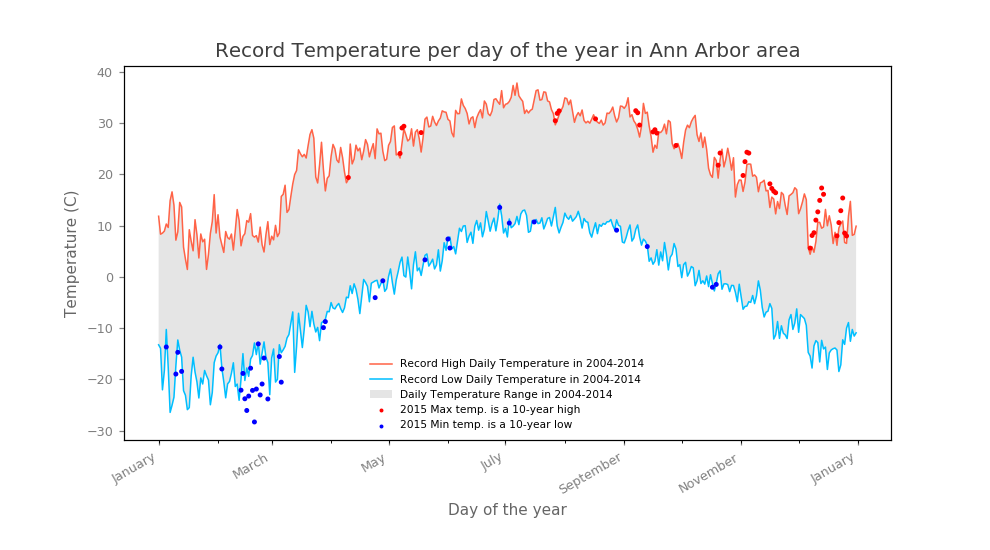

In [21]:
# Create the line chart for pre-2015 data
%matplotlib notebook
plt.figure(figsize=(9,5))
tmax = list(df_pre_2015.TMAX)
tmin = list(df_pre_2015.TMIN)
plt.plot(dates,tmax,'tomato', linewidth=1, zorder = 1)
plt.plot(dates,tmin, 'deepskyblue', linewidth=1, zorder = 2)
plt.fill_between(dates, tmin, tmax, facecolor='gray', alpha=0.2)
plt.xlabel('Day of the year', alpha = 0.6)
plt.ylabel('Temperature (C)', alpha = 0.6)
plt.title('Record Temperature per day of the year in Ann Arbor area', fontsize = 13, alpha = 0.75)

In [22]:
# Check on which days 2015 max/min broke 10-year record
df_2015=df_2015.merge(df_pre_2015, left_index=True, right_index=True) # bring pre-2015 records to 2015 dataframe for comparison
df_2015.head()

TMAX_x     TMIN_x     TMAX_y     TMIN_y
Month Day                                           
1     1   -3.200000  -9.861111  11.809524 -13.268182
      2    0.278947  -6.977778   8.304762 -13.957895
      3    1.805556  -4.800000   8.525000 -22.052632
      4    1.620000  -2.710000   8.915000 -18.310000
      5   -1.284211 -13.694737  10.294737 -10.276190

In [23]:
df_2015.columns = ['TMAX_2015','TMIN_2015','Pre_2015_TMAX','Pre_2015_TMIN']
df_2015.head()

TMAX_2015  TMIN_2015  Pre_2015_TMAX  Pre_2015_TMIN
Month Day                                                    
1     1    -3.200000  -9.861111      11.809524     -13.268182
      2     0.278947  -6.977778       8.304762     -13.957895
      3     1.805556  -4.800000       8.525000     -22.052632
      4     1.620000  -2.710000       8.915000     -18.310000
      5    -1.284211 -13.694737      10.294737     -10.276190

In [24]:
# Calculate when 2015 broke the record
df_2015['MAX_Record'] = (df_2015.TMAX_2015 > df_2015.Pre_2015_TMAX)
df_2015['MIN_Record'] = (df_2015.TMIN_2015 < df_2015.Pre_2015_TMIN)
df_2015.head()

TMAX_2015  TMIN_2015  Pre_2015_TMAX  Pre_2015_TMIN MAX_Record  \
Month Day                                                                  
1     1    -3.200000  -9.861111      11.809524     -13.268182      False   
      2     0.278947  -6.977778       8.304762     -13.957895      False   
      3     1.805556  -4.800000       8.525000     -22.052632      False   
      4     1.620000  -2.710000       8.915000     -18.310000      False   
      5    -1.284211 -13.694737      10.294737     -10.276190      False   

          MIN_Record  
Month Day             
1     1        False  
      2        False  
      3        False  
      4        False  
      5         True

In [25]:
# Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record high/low was broken in 2015
# 2015 record days will get size=5, other days will get size = 0 and will not be shown
plt.scatter(dates, df_2015.TMAX_2015, s=df_2015.MAX_Record*5, color = 'r', zorder = 3); 
plt.scatter(dates, df_2015.TMIN_2015, s=df_2015.MIN_Record*5, color = 'b',zorder = 4);

In [26]:
# Add legend
plt.legend(labels = ['Record High Daily Temperature in 2004-2014','Record Low Daily Temperature in 2004-2014',
                     'Daily Temperature Range in 2004-2014',
                     '2015 Max temp. is a 10-year high','2015 Min temp. is a 10-year low'], 
           frameon=False, loc = 'lower center', fontsize = 'x-small');

In [27]:
# Format x axis
import matplotlib.dates as mdates

# set monthly locator
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))

# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))

# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()

plt.tick_params(axis='both', colors='gray', labelsize = 'small')